In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.datasets import imdb
from keras import preprocessing

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.layers import Embedding

from keras.layers import LSTM
from keras.layers import GRU

Using TensorFlow backend.


# load imdb data

In [3]:
max_features = 10000 # Number of words to consider as features

# Loads the data as lists of integers
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

C:\Users\mucahit\anaconda3\envs\envp36\lib\site-packages\keras\datasets\imdb.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\mucahit\anaconda3\envs\envp36\lib\site-packages\keras\datasets\imdb.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [4]:
print(x_train.shape)
print(len(x_train[0]))
print(y_train[0])
print(x_train[0])

(25000,)
218
1
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


# imdb binary clf - densely connected model

## preparing data

In [5]:
# encoding integer sequences into a binary matrix
def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 # set specific indices of results[i] to 1s
    return results

In [7]:
x_train_v1 = vectorize_sequences(x_train) # vectorized training data
x_test_v1 = vectorize_sequences(x_test) # vectorized test data

y_train_v1 = np.asarray(y_train, dtype = 'float32') # vectorize labels
y_test_v1 = np.asarray(y_test, dtype = 'float32')

In [8]:
print(len(x_train_v1[0]))
print(x_train_v1[0])

10000
[0. 1. 1. ... 0. 0. 0.]


In [9]:
print(len(np.array(x_train_v1[0]))) # one hot encoded
print(sum(np.array(x_train_v1[0]))) # should be equal to len(np.unique((np.array(train_data[0]))))

10000
120.0


In [10]:
x_train_v1.shape

(25000, 10000)

## build model

In [11]:
model1 = models.Sequential()

# two intermediate layers with 16 hiddent units each with relu activation functions (which zero out negative values)
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))

# output layer with sigmoid activation function to output something that can be interpreted as probability
model1.add(layers.Dense(1, activation='sigmoid'))

# compile the model
model1.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize model
print(model1.summary())

model1.fit(x_train_v1, y_train_v1, epochs=4, batch_size = 512) # train the model in mini-batches of 512 samples

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.4566 - accuracy: 0.8251
Epoch 2/4
25000/25000 [==============================] - 2s 68us/step - loss: 0.2593 - accuracy: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.1996 - accuracy: 0.9274
Epoch 4/4
25000/25000 [==============================] - 2s 6

In [12]:
test_loss, test_accuracy = model1.evaluate(x_test_v1, y_test_v1)
print("test_loss: %s, test_accuracy: %s" %(np.round(test_loss,3), np.round(test_accuracy,3)))

25000/25000 [==============================] - 3s 109us/step
test_loss: 0.296, test_accuracy: 0.883


## Exercise 1
- Try using larger or smaller layers: E.g. 32 units, 128 units
- Instead of two hidden layers, try using a single hidden layer, or three hidden layers

### Exercise 1a

In [13]:
model1a = models.Sequential()

model1a.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model1a.add(layers.Dense(32, activation='relu'))

model1a.add(layers.Dense(1, activation='sigmoid'))
model1a.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model1a.fit(x_train_v1, y_train_v1, epochs=4, batch_size = 512) # train the model in mini-batches of 512 samples

test_loss, test_accuracy = model1a.evaluate(x_test_v1, y_test_v1)
print("test_loss: %s, test_accuracy: %s" %(np.round(test_loss,3), np.round(test_accuracy,3)))

Epoch 1/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.4315 - accuracy: 0.8080
Epoch 2/4
25000/25000 [==============================] - 2s 70us/step - loss: 0.2424 - accuracy: 0.9111
Epoch 3/4
25000/25000 [==============================] - 2s 71us/step - loss: 0.1876 - accuracy: 0.9297
Epoch 4/4
25000/25000 [==============================] - 2s 92us/step
test_loss: 0.31, test_accuracy: 0.88


### Exercise 1b

In [14]:
model1b = models.Sequential()

model1b.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1b.add(layers.Dense(1, activation='sigmoid'))
model1b.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model1b.fit(x_train_v1, y_train_v1, epochs=4, batch_size = 512) # train the model in mini-batches of 512 samples

test_loss, test_accuracy = model1b.evaluate(x_test_v1, y_test_v1)
print("test_loss: %s, test_accuracy: %s" %(np.round(test_loss,3), np.round(test_accuracy,3)))

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4710 - accuracy: 0.8285
Epoch 2/4
25000/25000 [==============================] - 2s 74us/step - loss: 0.2907 - accuracy: 0.9052
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2273 - accuracy: 0.9227
Epoch 4/4
25000/25000 [==============================] - 3s 101us/step
test_loss: 0.285, test_accuracy: 0.886


# imdb binary classification with word embeddings
- The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. 
- It takes integers as input, it looks up these integers in an internal dictionary, and it returns the associated vectors. It’s effectively a dictionary lookup

In [15]:
# Turn the lists of integers into a 2D integer tensor of shape (samples, maxlen)

maxlen = 200 # Cuts off the text after this number of words (among the max_features most common words)

x_train_v2 = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test_v2 = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [16]:
print(x_train_v2.shape)
print(len(x_train_v2[0]))
print(x_train_v2[0])
print(y_train[0])

(25000, 200)
200
[   5   25  100   43  838  112   50  670    2    9   35  480  284    5
  150    4  172  112  167    2  336  385   39    4  172 4536 1111   17
  546   38   13  447    4  192   50   16    6  147 2025   19   14   22
    4 1920 4613  469    4   22   71   87   12   16   43  530   38   76
   15   13 1247    4   22   17  515   17   12   16  626   18    2    5
   62  386   12    8  316    8  106    5    4 2223 5244   16  480   66
 3785   33    4  130   12   16   38  619    5   25  124   51   36  135
   48   25 1415   33    6   22   12  215   28   77   52    5   14  407
   16   82    2    8    4  107  117 5952   15  256    4    2    7 3766
    5  723   36   71   43  530  476   26  400  317   46    7    4    2
 1029   13  104   88    4  381   15  297   98   32 2071   56   26  141
    6  194 7486   18    4  226   22   21  134  476   26  480    5  144
   30 5535   18   51   36   28  224   92   25  104    4  226   65   16
   38 1334   88   12   16  283    5   16 4472  113  103   32

## build model

In [17]:
model2 = Sequential()

model2.add(Embedding(10000, 8, input_length=maxlen))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model2.summary()

history2 = model2.fit(x_train_v2, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 8)            80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1601      
Total params: 81,601
Trainable params: 81,601
Non-trainable params: 0
_________________________________________________________________


C:\Users\mucahit\anaconda3\envs\envp36\lib\site-packages\tensorflow\python\framework\indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 72us/step - loss: 0.5884 - acc: 0.7045 - val_loss: 0.4049 - val_acc: 0.8368
Epoch 2/10
20000/20000 [==============================] - 1s 67us/step - loss: 0.3090 - acc: 0.8786 - val_loss: 0.3078 - val_acc: 0.8724
Epoch 3/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.2345 - acc: 0.9086 - val_loss: 0.2796 - val_acc: 0.8874
Epoch 4/10
20000/20000 [==============================] - 1s 65us/step - loss: 0.1975 - acc: 0.9236 - val_loss: 0.2804 - val_acc: 0.8870: 0s - loss: 0.1968 - acc: 0.
Epoch 5/10
20000/20000 [==============================] - 1s 64us/step - loss: 0.1709 - acc: 0.9362 - val_loss: 0.2804 - val_acc: 0.8876
Epoch 6/10
20000/20000 [==============================] - 1s 66us/step - loss: 0.1490 - acc: 0.9454 - val_loss: 0.2878 - val_acc: 0.8864
Epoch 7/10
20000/20000 [==============================] - 1s 68us/step - loss: 0.1298 - acc: 0.9535 

## plot the validation ress

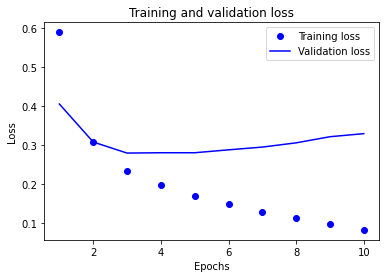

In [18]:
history_dict = history2.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

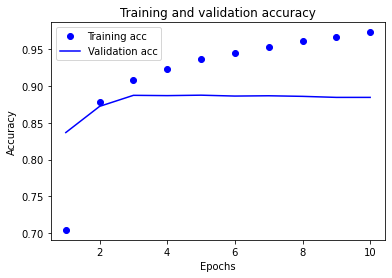

In [19]:
history_dict = history2.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# imdb binary classification with RNNs

In [20]:
# Training the model with Embedding and LSTM layers
model3 = Sequential()

model3.add(Embedding(max_features, 32))
model3.add(LSTM(32))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

history3 = model3.fit(x_train_v2, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.5099 - acc: 0.7583 - val_loss: 0.3828 - val_acc: 0.8374
Epoch 2/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2909 - acc: 0.8850 - val_loss: 0.3201 - val_acc: 0.8764
Epoch 3/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2284 - acc: 0.9140 - val_loss: 0.2930 - val_acc: 0.8778
Epoch 4/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1926 - acc: 0.9273 - val_loss: 0.3311 - val_acc: 0.8630
Epoch 5/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1691 - acc: 0.9380 - val_loss: 0.3316 - val_acc: 0.8810


## plot validation ress

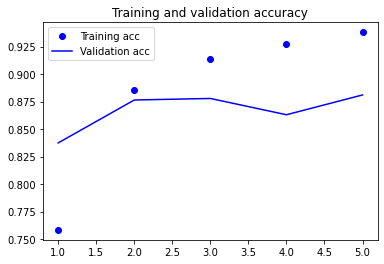

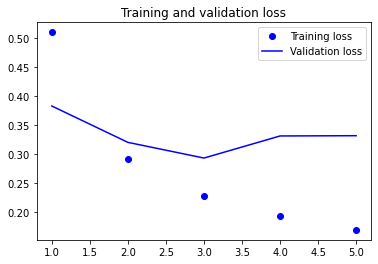

In [21]:
acc = history3.history['acc']
val_acc = history3.history['val_acc']
loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Exercise 2
- replace LSTM layer and perform the validation experiments

In [22]:
# Training the model with Embedding and LSTM layers
model3a = Sequential()

model3a.add(Embedding(max_features, 32))
model3a.add(GRU(32))
model3a.add(Dense(1, activation='sigmoid'))

model3a.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 

history3a = model3a.fit(x_train_v2, y_train,
                    epochs=5,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 20s 1ms/step - loss: 0.5327 - acc: 0.7309 - val_loss: 0.4782 - val_acc: 0.8132
Epoch 2/5
20000/20000 [==============================] - 20s 978us/step - loss: 0.3071 - acc: 0.8726 - val_loss: 0.3205 - val_acc: 0.8704
Epoch 3/5
20000/20000 [==============================] - 20s 1ms/step - loss: 0.2451 - acc: 0.9023 - val_loss: 0.3362 - val_acc: 0.8590
Epoch 4/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.2085 - acc: 0.9216 - val_loss: 0.4208 - val_acc: 0.8338
Epoch 5/5
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1856 - acc: 0.9312 - val_loss: 0.3323 - val_acc: 0.8730


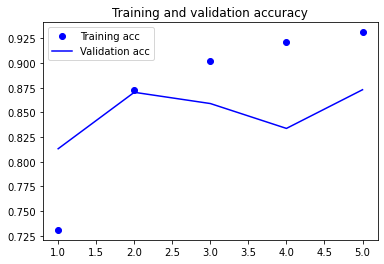

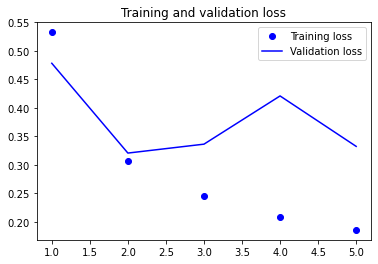

In [23]:
acc = history3a.history['acc']
val_acc = history3a.history['val_acc']
loss = history3a.history['loss']
val_loss = history3a.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()